In [1]:
# Library 
import numpy as np 
import pandas as pd 

In [6]:
# loading data 
df = pd.read_csv("C:/Users/DELL/OneDrive/Desktop/AI/Placement prediction  Project/placement.csv")

In [7]:
df.head

<bound method NDFrame.head of     Unnamed: 0  cgpa     iq  placement
0            0   6.8  123.0          1
1            1   5.9  106.0          0
2            2   5.3  121.0          0
3            3   7.4  132.0          1
4            4   5.8  142.0          0
..         ...   ...    ...        ...
95          95   4.3  200.0          0
96          96   4.4   42.0          0
97          97   6.7  182.0          1
98          98   6.3  103.0          1
99          99   6.2  113.0          1

[100 rows x 4 columns]>

In [15]:
# delete the un necessary dat named unnamed
df = df.drop("Unnamed: 0", axis=1)

In [16]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [17]:
# now lets save the updated data
df.to_csv("updated_file.csv", header=False, index=False)

In [18]:
df.shape 

(100, 3)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


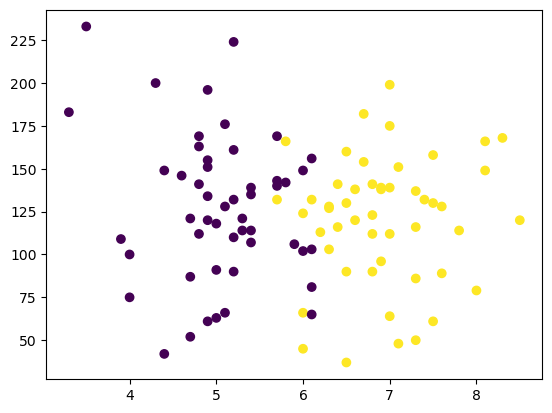

In [23]:
# Data visuliztion using scatterplot over cgpa  and placement 
import matplotlib.pyplot as plt
plt.scatter(df['cgpa'], df['iq'], c =df['placement'])

 ###  from above plot we got the following results , for these type of data we can use Logistic Regression  MOdel (which divide the set of the  diffent dots by a single line ) yellow dots represents the placement and black represents not 

# Model Traning 

In [25]:
 # Extract the input and output column split 
# # for input 
# X = df[[0, 1]] ( this process only use for integer there some have other data types )
# Y= df[2]
# if we use pandas 
# 1. Using .iloc
X = df.iloc[:, [0, 1]]
Y= df.iloc[:, [-1]]

In [26]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [27]:
Y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


# train test split 

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)
# its reprents the 10 percentage of data remains for test and 90 % are remains for train the model)

In [63]:
# Normalization and Scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Training  the model 

In [70]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) 
Y_train = Y_train['placement']

# Model Choosing ( Linear Regression )

In [71]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, Y_train)  # ✅ Works now


LogisticRegression()

In [72]:
print(Y_train.head())
print(Y_train.unique()[:20])
print(Y_train.dtype)

95    0
84    0
75    0
28    0
44    1
Name: placement, dtype: int64
[0 1]
int64


In [73]:
# Evaluate the Model 
y_pred =clf.predict(X_test)

# Accuracy Score 

In [74]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

1.0

#  got 100 % accuracy 

# behind the Scence # how the model took the decision ? 

# Decision Boundary for logistic Regression 

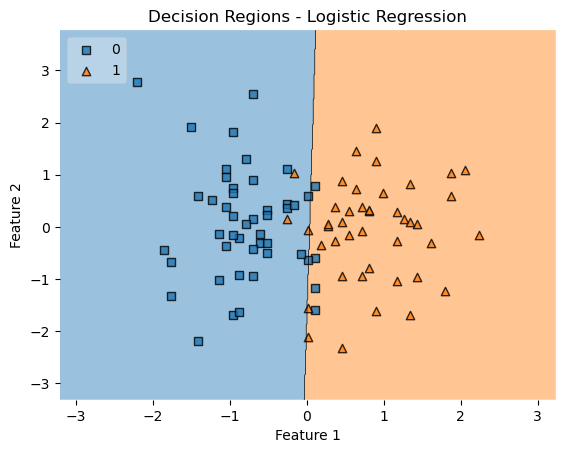

In [83]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Select first 2 features (must be 2D)
X_vis = X_train[:, :2]                 # NumPy array of shape (n_samples, 2)
y_vis = Y_train.values.astype(int)     # NumPy array of integers

# Train a logistic regression classifier on these 2 features
clf_vis = LogisticRegression()
clf_vis.fit(X_vis, y_vis)

# Plot decision regions
plot_decision_regions(X_vis, y_vis, clf=clf_vis, legend=2)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Regions - Logistic Regression')
plt.show()


# Saving Data on Json which make it useful , deploy it any platform and anyone can check their they got the placement option (yes/no)

In [89]:
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Example: X = df[['cgpa','iq']], Y = df['placement']
X = df[['cgpa', 'iq']].values
Y = df['placement'].values

# Optional: scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train Logistic Regression
clf = LogisticRegression()
clf.fit(X_scaled, Y)

# Save the model
with open('logistic_model.pkl', 'wb') as f:
    pickle.dump(clf, f)

# Save the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)


In [91]:
import json

feature_names = ['cgpa', 'iq']  # order matters!
with open('features.json', 'w') as f:
    json.dump(feature_names, f)

In [92]:
# Load model, scaler, and feature names
with open('logistic_model.pkl', 'rb') as f:
    clf = pickle.load(f)

with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

with open('features.json', 'r') as f:
    feature_names = json.load(f)

# Example: new user input
new_data = {'cgpa': 6.2, 'iq': 130}

# Convert to array in correct order
import numpy as np
X_new = np.array([[new_data[feat] for feat in feature_names]])

# Apply scaler
X_new_scaled = scaler.transform(X_new)

# Predict
prediction = clf.predict(X_new_scaled)
print("Placement Prediction:", prediction[0])


Placement Prediction: 1
